In [142]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [143]:
env = gym.make('FrozenLake-v0')# defining the environment

In [144]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [145]:
env.close()

In [146]:
env.action_space.n
env.observation_space.n 
env.action_space.sample()
env.observation_space.sample()# exploring the environment


12

In [147]:
def random_argmax_axis1(b):
    return np.argmax(np.random.random(b.shape) * (b.T==b.max(axis=1)).T, axis=1)

In [148]:
def epsilon_policy(s,Q_sa,env,epsilon):
    if np.random.random() < epsilon:
        action = env.action_space.sample() #exploration
    else:
        action = random_argmax_axis1(Q_sa)[s] #explotation
    return action

In [149]:
def plot_result(rewards,y_lable,window_size):
    plt.show()  
    i = 0
    new_y = []
    while i < len(rewards):
        new_y.append(np.mean(rewards[i: i+ window_size]))
        i += window_size
    plt.plot(new_y)
    plt.ylabel(y_lable)
    plt.show()

In [150]:
Q_sa = np.zeros((env.observation_space.n,env.action_space.n))# defining Q table

In [151]:
EPISODES = 40000 
LEARNING_RATE = 0.2
DISCOUNT_FACTOR = 1
epsilon = 1.0
rewards = []

In [152]:
for i in range(EPISODES):
    s = env.reset()
    a = epsilon_policy(s,Q_sa,env,epsilon)
    done = False

    while not done:
        new_state, reward, done, _ = env.step(a)
        new_a = epsilon_policy(new_state,Q_sa,env,epsilon)
        current_q = Q_sa[s, a]
        new_q = Q_sa[new_state, new_a]
        Q_sa[s,a] = current_q + LEARNING_RATE * (reward + DISCOUNT_FACTOR * new_q -  current_q) #formula of SARSA learning
        epsilon -= 1/(EPISODES) if epsilon > 0 else 0 
        s = new_state
        a = new_a
    rewards.append(reward)    


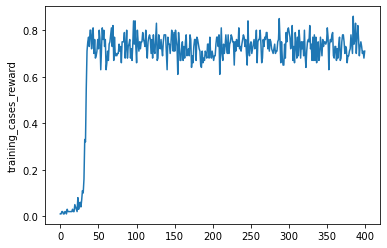

In [153]:
plot_result(rewards,'training_cases_reward',100)

In [154]:
Q_sa

array([[0.80502254, 0.30016909, 0.44045012, 0.34208488],
       [0.19339432, 0.14369006, 0.09573203, 0.64976016],
       [0.49302293, 0.12299869, 0.10713283, 0.10602811],
       [0.03050616, 0.02456757, 0.03117997, 0.14636187],
       [0.80398879, 0.22289273, 0.33964848, 0.35752386],
       [0.        , 0.        , 0.        , 0.        ],
       [0.35926457, 0.01645494, 0.07074344, 0.0284015 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.27843116, 0.46355279, 0.2598143 , 0.80201048],
       [0.41611113, 0.82640029, 0.34018059, 0.0847695 ],
       [0.68812086, 0.22488702, 0.1453539 , 0.23012188],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.45828916, 0.44992779, 0.86429099, 0.36861953],
       [0.63908747, 0.92782823, 0.57898064, 0.57296374],
       [0.        , 0.        , 0.        , 0.        ]])

In [155]:
greedy_policy = random_argmax_axis1(Q_sa)

In [156]:
def test(policy):
    rewards = 0
    TEST_EPISODES = 100
    for i in range(TEST_EPISODES):
        state  = env.reset()
        done = False
        while not done:
            action = policy[state]
            state, reward, done, _ = env.step(action)
            if done:
                rewards += reward
    return rewards/TEST_EPISODES

In [157]:
mean_rewards_list = []
mean_rewards = 0
n = 1000
for i in range(n):
    reward = test(greedy_policy)
    mean_rewards_list.append(reward)
    mean_rewards += reward

In [158]:
print("mean Reward from {} test cases is :{}" .format(n,mean_rewards/n))

mean Reward from 1000 test cases is :0.7299700000000015


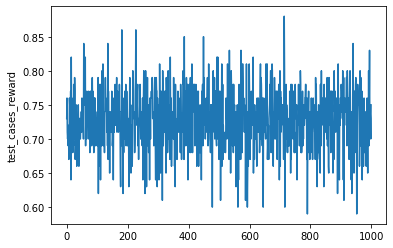

In [159]:
plot_result(mean_performance_list,'test_cases_reward', 1)